In [2]:
    """
    1. Pandas를 이용하여 두개의 Data set을 읽어 들인 후 “제작국가” 
    column을 추가하고 한국영화에는 “한국”, 
    외국영화에는 “외국”이라고 표시하시오.
    """
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

df2 = pd.read_csv(r'역대흥행1000_영화\역대흥행500_외국영화.csv')
df = pd.read_csv(r'역대흥행1000_영화\역대흥행500_한국영화.csv')

df['제작국가']='한국'
df2['제작국가']='외국'

In [3]:
    """ 2. 이중 한국영화의 자료에는 숫자가 1000단위만다 “,”가 있어 외국영화와 다른 형식으로 표현되어 있습니다. 
    한국영화의 DataFrame에서 정수를 표시하는 “,” 를 삭제하시오.
    또한 외국영화 자료에는 “Not a Number”를 나타내는 nan 이 있는데 이를 숫자 0으로 바꾸시오.
    (참고: Python String의 replace method를 각 column에 적용해 보는 것을 고려해 볼 수 있다
    """
    

df['관객수'] = df['관객수'].str.replace(',','')
df['스크린수'] = df['스크린수'].str.replace(',','')
df['매출액'] = df['매출액'].str.replace(',','')
df['매출액'] = df['매출액'].replace(np.NaN,0)
df2['관객수'] = df2['관객수'].str.replace(',','')
df2['관객수']= df2['관객수'].replace(np.NaN,0)
df2['스크린수']= df2['스크린수'].replace(np.NaN,0)


In [4]:
    """3. df. types와 같은 method 를 통해 각 column의 data type 을 출력하고 숫자로 표시되어야 할 “매출액”, “관객수”, “스크린수”는 “float64”로,  “개봉일”은 시간을 나타내는  “datetime64” 형식으로 변경 하시오 (참고: df.astype method등으로 자료의 형식을 변경할 수 있다)
    """

df['관객수'] = df.loc[:,'관객수'].astype('float')
df['스크린수'] = df.loc[:,'스크린수'].astype('float')
df['매출액'] = df.loc[:,'매출액'].astype('float')
df['개봉일'] = df.loc[:,'개봉일'].astype('datetime64')
df2['관객수'] = df2.loc[:,'관객수'].astype('float')
df2['스크린수'] = df2.loc[:,'스크린수'].astype('float')
df2['매출액'] = df2.loc[:,'매출액'].astype('float')
df2['개봉일'] = df2.loc[:,'개봉일'].astype('datetime64')


In [5]:
    """4. 이후 2개의 DataFrame 을 합치고 (pd.concat등 사용), “자료의 값이  0 인 곳은  nan으로 대체하고 이어서 df.dropna등을 사용하여 dataframe 에서 제거하시오. 유효한 자료를 보유한 영화는 총 몇 개가 남았는지 출력하시오.
    """
    
df3 = pd.concat([df,df2])
df3.replace(0,np.nan,True)
df3_nonan = df3.dropna(axis=0)
n_movies = df3_nonan['순위'].size
print(f'유효한 자료를 보유한 영화는 {n_movies}개이다')


유효한 자료를 보유한 영화는 707개이다


In [6]:
    """  5. 위에서 합쳐진 DataFrame을 이용하여 “상영관당관객수” 열(column)을 만들고 각 영화마다 관객수를 상영관수로 나누어 그 값을 계산하시오.
    """

df3_nonan['스크린당관객수'] = df3_nonan.loc[:,'관객수'] / df3_nonan.loc[:,'스크린수']


C:\Users\USer\AppData\Local\Temp/ipykernel_20080/2154476914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_nonan['스크린당관객수'] = df3_nonan.loc[:,'관객수'] / df3_nonan.loc[:,'스크린수']


In [7]:
    """  6. 합쳐진 DataFrame을 이용하여 “매출액”, “관객수”,  “스크린당(상영관당)관객수”로 정렬한 후 각 기준 1~10위의 영화를 출력하시오.
    """
    
df_earn = df3_nonan.sort_values('매출액', ascending=False)
df_aud = df3_nonan.sort_values('관객수',ascending=False)
df_audbyscreen = df3_nonan.sort_values('스크린당관객수',ascending=False)
print('매출액의 상위 10개 영화')
print(df_earn.iloc[:10,1])
print('관객수의 상위 10개 영화')
print(df_aud.iloc[:10, 1])
print('스크린당관객수의 상위 10개 영화')
print(df_audbyscreen.iloc[:10,1])

매출액의 상위 10개 영화
1          극한직업
0            명량
9         범죄도시2
2           아바타
0    어벤져스: 엔드게임
2     신과함께-죄와 벌
1        겨울왕국 2
3          국제시장
3           알라딘
4           베테랑
Name: 영화명, dtype: object
관객수의 상위 10개 영화
0            명량
1          극한직업
2     신과함께-죄와 벌
3          국제시장
0    어벤져스: 엔드게임
1        겨울왕국 2
2           아바타
4           베테랑
6           도둑들
7       7번방의 선물
Name: 영화명, dtype: object
스크린당관객수의 상위 10개 영화
158               워낭소리
246           색즉시공 시즌2
80     님아, 그 강을 건너지 마오
29               과속스캔들
498               내 사랑
7              7번방의 선물
89              비긴 어게인
35                  써니
16                 해운대
10         광해, 왕이 된 남자
Name: 영화명, dtype: object


(0.0, 14.0)

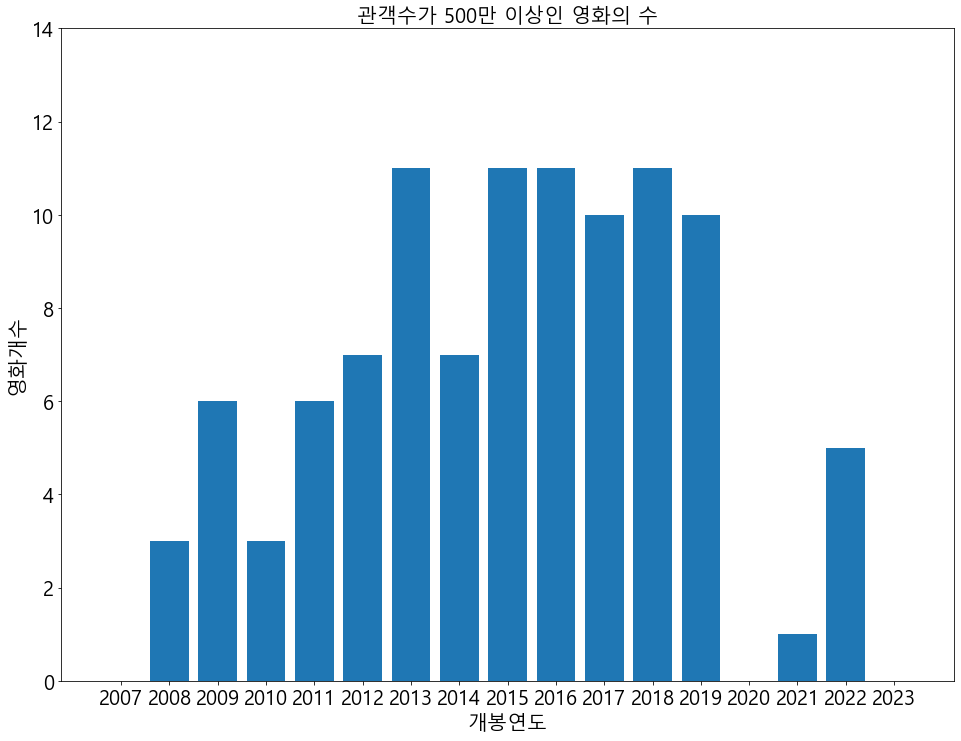

In [8]:
""" 7. 영화가 제작된 연도를 바탕으로 관객수가 500만 이상인 영화의 수를 연도별로 bar chart 형태로 그리시오
"""

df_year = df3_nonan.sort_values('개봉일')
startyear = df_year.개봉일.iloc[0].year
years = [] #x축이 될 자료
year500 = [] # y축이 될 영화 개수
for i in range(startyear, 2024):
    years.append(i)
    year_bool = (df3_nonan.개봉일.dt.year == i) & (df3_nonan.관객수 >= 5000000) #startyear와 연도가 같고, 관객수가 500만 이상인 영화 bool arr
    year500.append(np.sum(year_bool))
    
fontsize = 20
matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
plt.figure(figsize = (16,12))
plt.bar(years, year500)
plt.xticks(years, fontsize = fontsize)
plt.yticks([0,2,4,6,8,10,12,14], fontsize = fontsize)
plt.xlabel('개봉연도', fontsize=fontsize)
plt.ylabel('영화개수', fontsize=fontsize)
plt.title('관객수가 500만 이상인 영화의 수', fontsize=fontsize)
plt.ylim(0,14)


In [9]:
    """ 8. 전체 영화의 “매출액” 과 “관객수”의 평균 및 표준편차를 구하고 그 값을 정수 형태로 출력 하시오.
    """
    
avg_earn = int(np.average(df3_nonan.매출액))
std_earn = int(np.std(df3_nonan.매출액))
avg_aud = int(np.average(df3_nonan.관객수))
std_aud = int(np.std(df3_nonan.관객수))
print(f'관객수의 평균은 {avg_aud}이고, 관객수의 표준편차는 {std_aud}이다.')
print(f'매출액의 평균은 {avg_earn}이고, 관객수의 표준편차는 {std_earn}이다.')

관객수의 평균은 2939816이고, 관객수의 표준편차는 2589490이다.
매출액의 평균은 23343428178이고, 관객수의 표준편차는 21300819861이다.


In [10]:
    """ 9. 전체영화 중 매출액과 관객수 상위 10%, 하위 10%에 해당하는 값을 구한 후  출력하시오 (숫자의 출력의 형태는 8번과 동일) --> 상위10%와 하위 10%에 해당하는 값을 각각 매출액, 관객수에 대해 출력만 하면 됩니다. (영화 제목 출력 필요 없습니다. 너무 출력값이 많아집니다) 
    """
    
audmax10 = df_aud.iloc[int(n_movies*0.1), 4]
audmin10 = df_aud.iloc[-int(n_movies*0.1),4]
earnmax10 = df_earn.iloc[int(n_movies*0.1),3]
earnmin10 = df_earn.iloc[-int(n_movies*0.1),3]
print(f'상위 10%의 관객을 보유한 영화의 관객수는 {audmax10}명이고, 하위 10%의 관객을 보유한 영화의 관객수는 {audmin10}명이다.')
print(f'상위 10%의 매출액을 기록한 영화의 매출액은 {earnmax10}원이고, 하위 10%의 매출액을 기록한 영화의 매출액은 {earnmin10}원이다.')

상위 10%의 관객을 보유한 영화의 관객수는 6126488.0명이고, 하위 10%의 관객을 보유한 영화의 관객수는 992064.0명이다.
상위 10%의 매출액을 기록한 영화의 매출액은 47800698826.0원이고, 하위 10%의 매출액을 기록한 영화의 매출액은 7538083500.0원이다.


38146000.0
139647979516.0
17613682.0
791173.0


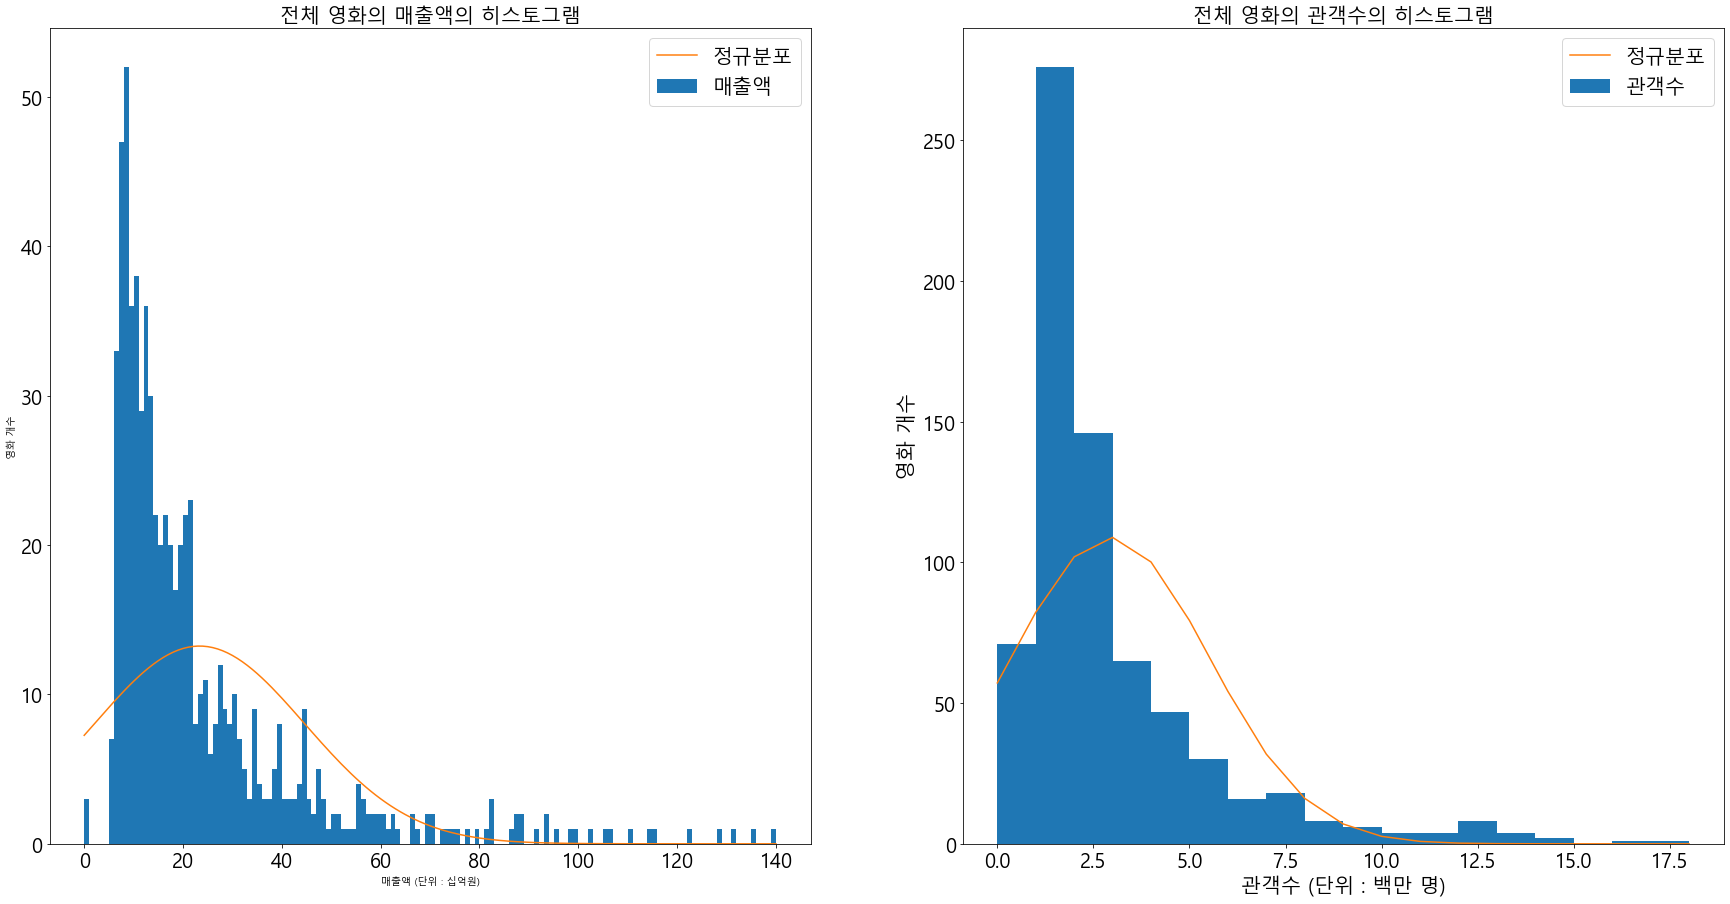

In [41]:
    """10 . 전체 영화에 대하여 매출액과 관객수를 각각 bin 크기 1,000,000,000 (십억) 원, 1,000,000 (백만) 명 단위로 나누어 작성하고 
    이를 8번의 평균과 표준편차에 해당하는 정규분포와 비교하는 그림을 그리시오. 
    영화의 매출액과 관객수는 정규 분포를 따르는지 간략히 Code 내에서 comment  기호을 이용하여 언급하시오
    """
    
print(df_earn.iloc[-1,3]) # 매출액 꼴찌의 매출액
print(df_earn.iloc[0,3]) # 매출액 1위의 매출액
print(df_aud.iloc[0,4]) # 관객수 1위의 관객수
print(df_aud.iloc[-1,4]) # 관객수 꼴찌의 관객수


from scipy.stats import norm
import scipy
earn_rv = norm(loc = avg_earn/1000000000, scale = std_earn / 1000000000) # 매출액의 정규분포
earnx_values = np.arange(0,141,1)
earny_values = earn_rv.pdf(earnx_values)*n_movies

aud_rv = norm(loc = avg_aud/1000000, scale = std_aud/1000000)
audx_values = np.arange(0,19,1)
audy_values = aud_rv.pdf(audx_values)*n_movies










plt.figure(figsize = (30,15))
plt.subplot(1,2,1)
df_earn_only = df_earn.매출액 / 1000000000
plt.hist(df_earn_only,bins = earnx_values, label = '매출액')
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.xlabel('매출액 (단위 : 십억원)')
plt.ylabel('영화 개수')
plt.title('전체 영화의 매출액의 히스토그램',fontsize = fontsize)
plt.plot(earnx_values, earny_values, label = '정규분포')
plt.legend(fontsize = fontsize)



plt.subplot(1,2,2)
df_aud_only = df_aud.관객수 / 1000000
plt.hist(df_aud_only, bins = audx_values, label = '관객수')
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.xlabel('관객수 (단위 : 백만 명)',fontsize = fontsize)
plt.ylabel('영화 개수',fontsize = fontsize)
plt.title('전체 영화의 관객수의 히스토그램',fontsize = fontsize)
plt.plot(audx_values, audy_values, label = '정규분포')
plt.legend(fontsize = fontsize)    
# 

array([8.08759730e-02, 1.16369677e-01, 1.44242364e-01, 1.54020501e-01,
       1.41676207e-01, 1.12265937e-01, 7.66358159e-02, 4.50659217e-02,
       2.28295538e-02, 9.96275118e-03, 3.74536232e-03, 1.21294493e-03,
       3.38392731e-04, 8.13267955e-05, 1.68375535e-05, 3.00301161e-06,
       4.61389521e-07, 6.10676399e-08, 6.96285321e-09])

In [37]:
23343428178/1000000000

23.343428178